<a href="https://colab.research.google.com/github/fbottinipiccoli/fbottinipiccoli.github.io/blob/master/Tarea1_Bottini_Lamparelli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En primer lugar, importamos la base de datos con la que vamos a trabajar.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving base_tarea.xls to base_tarea (4).xls


Importamos "pandas" y le pedimos que lea la base que subimos y la renombre como cars. 

A lo largo del trabajo nos guiaremos también de tutoriales de Panda que obtuvimos de https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/02_read_write.html.

*pandas provides the read_csv() function to read data stored as a csv file into a pandas DataFrame.*


In [ ]:
import pandas as pd
import io
df = pd.read_excel('base_tarea.xls')


1.	Mostrar las primeras y últimas filas de la base (.head). 

*To see the first N rows of a DataFrame, use the head() method with the required number of rows (in this case 8) as argument.*

In [ ]:
df.head(5)

,Year,ID,Name,State,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,56004,10,22392,2003-06-17
1,2013,103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447,2005-09-21
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784,2001-01-13
3,2013,103246,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,87587,13,29193,2006-01-03
4,2013,103451,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,147499,27,46393,2007-05-21


*Interested in the last N rows instead? pandas also provides a tail() method.*

In [ ]:
df.tail(5)

,Year,ID,Name,State,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
1445,2013,1103254,Fidelity Mine,Refuse Recovery,Perry,"Active, men working, not producing",Refuse,Operating Subsidiary,18532,4,8249,2006-02-05
1446,2013,1102636,Wfi,Refuse Recovery,Saline,"Active, men working, not producing",Refuse,Indepedent Producer Operator,5070,4,1449,2007-02-07
1447,2013,4407233,Gobco #8,Refuse Recovery,Russell,Active,Refuse,Indepedent Producer Operator,377607,16,43684,2002-08-17
1448,2013,1518524,Turkey Pen Refuse,Refuse Recovery,Pike,Active,Refuse,Indepedent Producer Operator,7744,2,622,2002-08-16
1449,2013,1519685,Fedscreek Refuse Pile,Refuse Recovery,Pike,"Active, men working, not producing",Refuse,Indepedent Producer Operator,17357,3,1020,2005-09-28


2. Obtener los tipos de datos de las variables. 

In [ ]:
print(df.dtypes)

Year                          int64
ID                            int64
Name                         object
State                        object
County                       object
Status                       object
Type                         object
Company Type                 object
Production                    int64
Average Employees             int64
Labor_Hours                   int64
date                 datetime64[ns]
dtype: object


3. Mostrar las primeras y últimas filas de la base de 3 columnas que elija (, usecols=cols) 

In [ ]:
#df.head(5), usecols=["Year", "State", "County"]
cols = ['Year', 'Type', 'Status']
df3 = pd.read_excel('base_tarea.xls', usecols=cols)
df3.head(5)



In [ ]:
df3.tail(5)

,Year,Status,Type
1445,2013,"Active, men working, not producing",Refuse
1446,2013,"Active, men working, not producing",Refuse
1447,2013,Active,Refuse
1448,2013,Active,Refuse
1449,2013,"Active, men working, not producing",Refuse


4.	Mostrar las estadísticas básicas (media, sd, min, max) de Production (df["Production"].sum()).

In [ ]:
print(df["Production"].mean())
print(df["Production"].max())
print(df["Production"].min())
print(df["Production"].std())

679201.2268965517
111005549
0
4414922.445079227


5. Insertar una columna en la quinta posición y llenala de valores NaN (df.insert(XX, "columna", np.nan))


In [ ]:
import numpy as np
df.insert(4, "Column", np.nan)


,Year,ID,Name,State,Column,County,Columna,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
0,2013,103381,Tacoa Highwall Miner,Alabama,NaN,Bibb,NaN,"Active, men working, not producing",Surface,Indepedent Producer Operator,56004,10,22392,2003-06-17


6.	Importar a un dataframe los datos saltando las primeras 10 filas. (skiprows = XX)

In [ ]:
df6 = pd.read_excel('base_tarea.xls', skiprows = [0-9])



7.	Añadir una fila con la producción total y las horas de trabajo totales.  (usar .sum(), pd.DataFrame(data=sum_row).T y reindex para agregar la fila).

In [ ]:
df6.head(5)
sum_row = df6.sum()
sum_row = pd.DataFrame(data=sum_row)
sum_row.head(6)
sum_row = sum_row.T
df6 = df6.append(sum_row , ignore_index = True)
df6 = df6.reset_index()
df6.tail(5)

,index,Year,ID,Name,State,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
1446,1446,2013,1102636,Wfi,Refuse Recovery,Saline,"Active, men working, not producing",Refuse,Indepedent Producer Operator,5070,4,1449,2007-02-07
1447,1447,2013,4407233,Gobco #8,Refuse Recovery,Russell,Active,Refuse,Indepedent Producer Operator,377607,16,43684,2002-08-17
1448,1448,2013,1518524,Turkey Pen Refuse,Refuse Recovery,Pike,Active,Refuse,Indepedent Producer Operator,7744,2,622,2002-08-16
1449,1449,2013,1519685,Fedscreek Refuse Pile,Refuse Recovery,Pike,"Active, men working, not producing",Refuse,Indepedent Producer Operator,17357,3,1020,2005-09-28
1450,1450,2918850,4451433769,NaN,AlabamaAlabamaAlabamaAlabamaAlabamaAlabamaAlab...,BibbBlountFayetteFranklinFranklinJacksonJeffer...,"Active, men working, not producingPermanently ...",SurfaceSurfaceUndergroundSurfaceSurfaceSurface...,Indepedent Producer OperatorIndepedent Produce...,984841779,80396,177910757,NaT


8.	Importar a un data frame las primeras 10 filas (df.headl(n=10))

In [ ]:
df8 = pd.read_excel('base_tarea.xls', nrows=10) 
print(df8)

   Year      ID  ... Labor_Hours       date
0  2013  103381  ...       22392 2003-06-17
1  2013  103404  ...       28447 2005-09-21
2  2013  100759  ...      474784 2001-01-13
3  2013  103246  ...       29193 2006-01-03
4  2013  103451  ...       46393 2007-05-21
5  2013  103433  ...       47195 2005-06-25
6  2013  100329  ...      144002 2006-02-05
7  2013  100851  ...     1001809 2007-02-07
8  2013  102901  ...       12396 2002-08-17
9  2013  102901  ...     1237415 2002-08-16

[10 rows x 12 columns]


9.	Crear un subtotal de "Horas de trabajo" por ID (.groupby(ID').sum

In [ ]:
#horas_trabajo = df.groupby('ID').sum()
#horas_trabajo.head()

df9=df[["ID","Labor_Hours"]].groupby('ID').sum()
df9

,Labor_Hours
ID,
100329,144002
100347,215295
100515,6240
100759,474784
100851,1001809
...,...
4801353,2811138
4801429,161270
4801645,35687


10.	Mostrar los valores para un ID de MSHA específico (ej. 102976).  

In [ ]:
df[df["ID"]==102976].head()

,Year,ID,Name,State,Column,County,Columna,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
18,2013,102976,Piney Woods Preparation Plant,Alabama,NaN,Shelby,NaN,Active,Surface,Indepedent Producer Operator,0,5,14828,2006-11-15
19,2013,102976,Piney Woods Preparation Plant,Alabama,NaN,Shelby,NaN,Active,Underground,Indepedent Producer Operator,0,9,23193,2007-08-10


11.	Mostrar aquellas observaciones en las que "Horas de trabajo" > 25000.  

In [ ]:
df[df["Labor_Hours"] > 25000].head()

,Year,ID,Name,State,Column,County,Columna,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
1,2013,103404,Reid School Mine,Alabama,NaN,Blount,NaN,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447,2005-09-21
2,2013,100759,North River #1 Underground Min,Alabama,NaN,Fayette,NaN,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784,2001-01-13
3,2013,103246,Bear Creek,Alabama,NaN,Franklin,NaN,Active,Surface,Indepedent Producer Operator,87587,13,29193,2006-01-03
4,2013,103451,Knight Mine,Alabama,NaN,Franklin,NaN,Active,Surface,Indepedent Producer Operator,147499,27,46393,2007-05-21
5,2013,103433,Crane Central Mine,Alabama,NaN,Jackson,NaN,Temporarily closed,Surface,Indepedent Producer Operator,69339,27,47195,2005-06-25


12.	Encuentre todos los registros que incluyan dos identificaciones específicas de ID (.isin)

In [ ]:
df[df["ID"].isin([102976,103246])].head()

,Year,ID,Name,State,Column,County,Columna,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
3,2013,103246,Bear Creek,Alabama,NaN,Franklin,NaN,Active,Surface,Indepedent Producer Operator,87587,13,29193,2006-01-03
18,2013,102976,Piney Woods Preparation Plant,Alabama,NaN,Shelby,NaN,Active,Surface,Indepedent Producer Operator,0,5,14828,2006-11-15
19,2013,102976,Piney Woods Preparation Plant,Alabama,NaN,Shelby,NaN,Active,Underground,Indepedent Producer Operator,0,9,23193,2007-08-10


13.	Ordenar los registros por la columna “Horas de trabajo” (df.sort_values). 

In [ ]:
df13 = df.sort_values('Labor_Hours')

14.	Haga una lista en donde date esté entre febrero 2005 y noviembre 2006 (df['date'] >=XX).

In [ ]:
df14 = df[(df['date'] >='Feb-2005') & (df['date'] <= 'Nov-2006')].head()
df14

,Year,ID,Name,State,Column,County,Columna,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
1,2013,103404,Reid School Mine,Alabama,NaN,Blount,NaN,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447,2005-09-21
3,2013,103246,Bear Creek,Alabama,NaN,Franklin,NaN,Active,Surface,Indepedent Producer Operator,87587,13,29193,2006-01-03
5,2013,103433,Crane Central Mine,Alabama,NaN,Jackson,NaN,Temporarily closed,Surface,Indepedent Producer Operator,69339,27,47195,2005-06-25
6,2013,100329,Concord Mine,Alabama,NaN,Jefferson,NaN,Active,Underground,Operating Subsidiary,0,59,144002,2006-02-05
10,2013,103180,Sloan Mountain Mine,Alabama,NaN,Jefferson,NaN,Active,Surface,Indepedent Producer Operator,327780,84,196963,2005-09-28


15.	Mostrar la lista de aquellos cuyos date sea 2005 (use df.set_index)


In [ ]:
df15 = df.set_index(['date'])
list = df15["2005"]


AssertionError: ignored

16.	Ordenar en base a ID y date columnas dadas (df.sort_values(by=['xx','xx'], ascending=[0,1]))

In [ ]:
df16 = df.sort_values(by=['ID','date'],ascending=[0,1])

17.	Crear tres hojas de datos (sheet) desde el archivo de Excel y combinarlas en un único Excel. Las tres hojas de datos son las mismas, sería triplicar el Excel (pd.concat)

In [ ]:
df171 = pd.read_excel('base_tarea.xls', sheet_name=0)
df172 = pd.read_excel('base_tarea.xls', sheet_name=1)
df173 = pd.read_excel('base_tarea.xls', sheet_name=2)
df17 = pd.concat([df171, df172, df173])
print(df17)

IndexError: ignored

18.	Dibujar un gráfico de barras comparando el año, el ID, la producción y las horas de trabajo de las primeras 10 observaciones (usar head(10) y plot(kind='bar')).

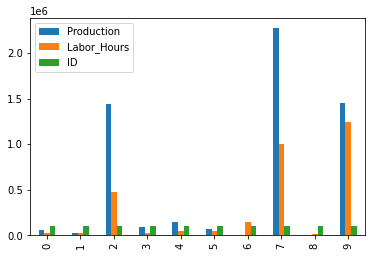

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
df.head(10).plot(y=["Production", "Labor_Hours", "ID"], kind="bar")


19.	Dibujar un gráfico de barras de las 10 empresas con mayor producción (df.sort_values). 

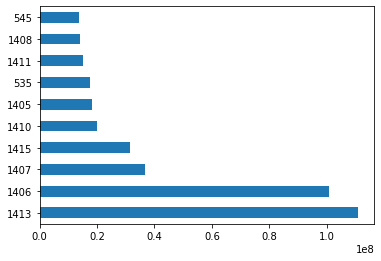

In [ ]:
production_10 = df.sort_values(['Production'], ascending=False).head(10)
production_10['Production'].head(10).plot(kind="barh")
plt.show()